1. Introducción

    En este trabajo práctico final se analizarán los datos de ventas de productos Samsung con tecnología 5G en el periodo 2019-2024. El objetivo principal es identificar los modelos que fueron adoptando la tecnologia y sus diferentes impactos regionales a lo largo del tiempo. 
    
    El análisis permite observar tendencias de adopción del 5G y su distribución en distintas partes del mundo. Se utilizarán herramientas como Python, Pandas y visualizaciones para apoyar los hallazgos.


In [13]:
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('SamsungVentas.csv')


     En este grafico vamos a mostrar los datos con los que vamos a trabajar, que cumplen las siguiente caractetistica, contar con tecnologia 5G. 


['Año', 'Trimestre', 'Modelo de Producto', 'Capacidad_5G', 'Unidades Vendidas', 'Ingresos ($)', 'Cuota de Mercado (%)', 'Cobertura Regional 5G (%)', 'Suscriptores 5G (millones)', 'Velocidad Promedio 5G (Mbps)', 'Preferencia por 5G (%)', 'Región']


C:\Users\Michelle\AppData\Local\Temp\ipykernel_3760\2177723070.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_agrupado, x=columna_modelo, y=columna_ventas,


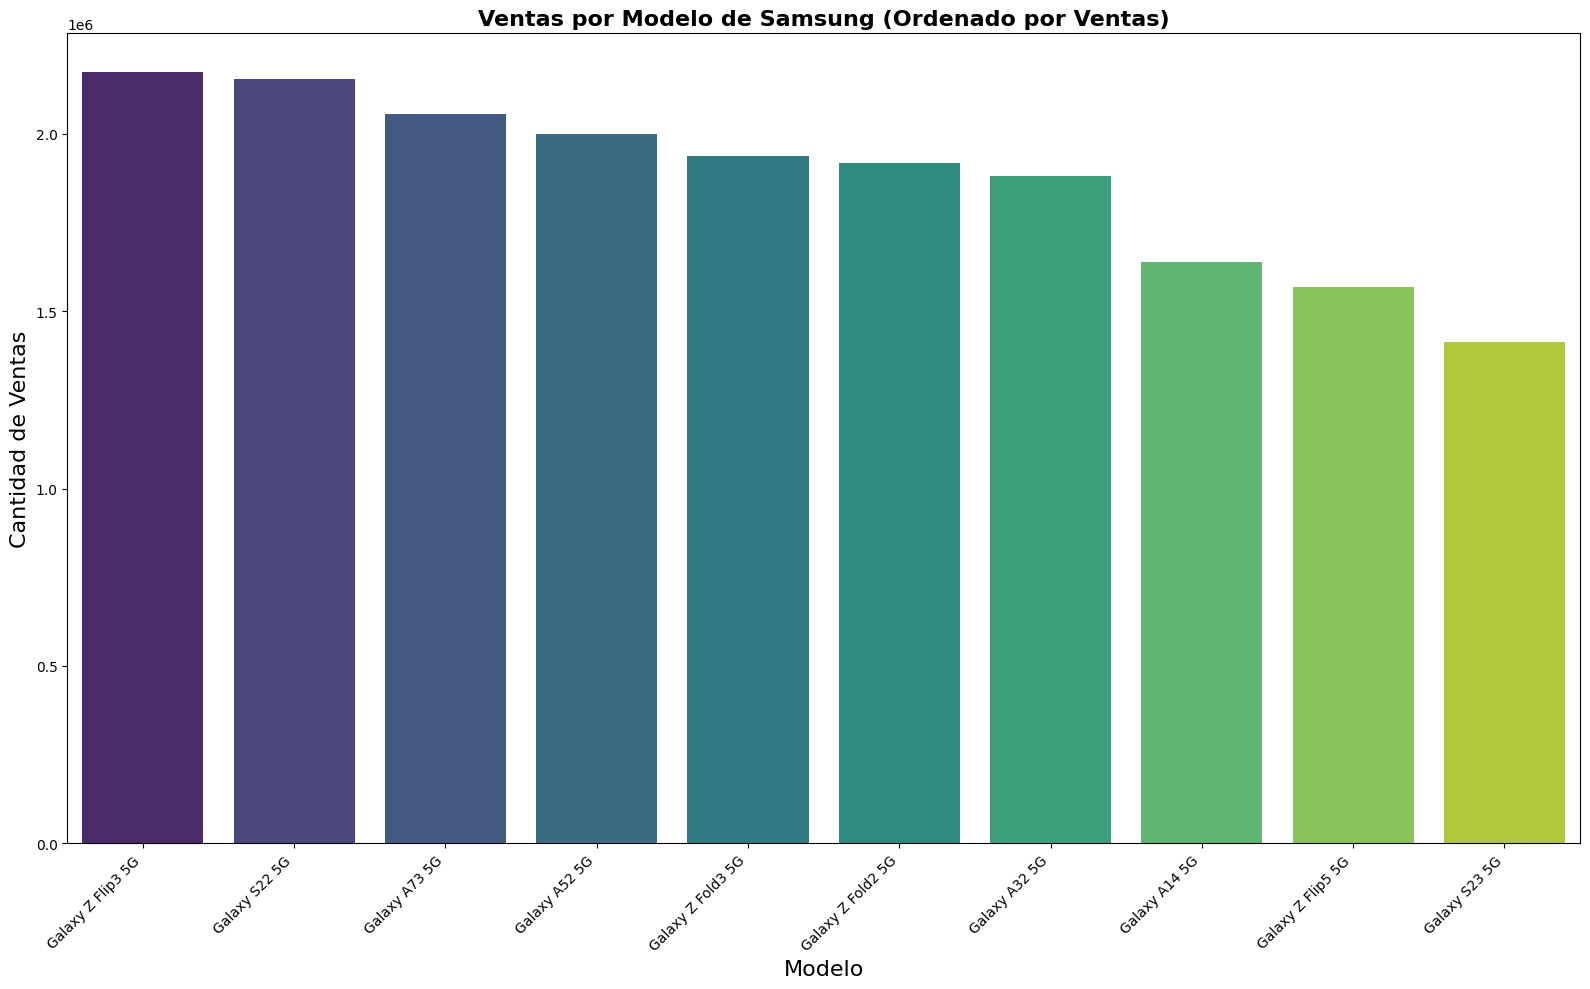

In [14]:
query = "SELECT * FROM df WHERE Capacidad_5G = 'Yes'"
df = sqldf(query, locals())
# Ajusta estos nombres según tus columnas reales
columna_modelo = 'Modelo de Producto'  # Cambia por el nombre real de tu columna
columna_ventas = 'Unidades Vendidas'  # Cambia por el nombre real de tu columna

# Si no estás seguro de los nombres, descomenta esta línea:
print(df.columns.tolist())

# Agrupar por modelo y sumar las ventas
ventas_por_modelo = df.groupby(columna_modelo)[columna_ventas].sum().sort_values(ascending=False)

# Alternativa usando seaborn (más moderno)
plt.figure(figsize=(16, 10))
df_agrupado = df.groupby(columna_modelo)[columna_ventas].sum().reset_index()
df_agrupado = df_agrupado.sort_values(columna_ventas, ascending=False)

sns.barplot(data=df_agrupado, x=columna_modelo, y=columna_ventas, 
            palette='viridis', order=df_agrupado[columna_modelo])
plt.title('Ventas por Modelo de Samsung (Ordenado por Ventas)', fontsize=16, fontweight='bold')
plt.xlabel('Modelo', fontsize=16)
plt.ylabel('Cantidad de Ventas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


El análisis que se llevará a cabo a continuación tiene como objetivo determinar la relación
entre las diferentes regiones y la cantidad de suscripciones al 5G en los modelos de telefonos celulares.



=== ANÁLISIS DE SUSCRIPTORES 5G POR REGIÓN ===

Suscriptores 5G por Región (millones):
Región
Latin America           3997.83
North America           3543.40
Europe                  3156.84
Asia-Pacific            3133.36
Middle East & Africa    2970.70
Name: Suscriptores 5G (millones), dtype: float64


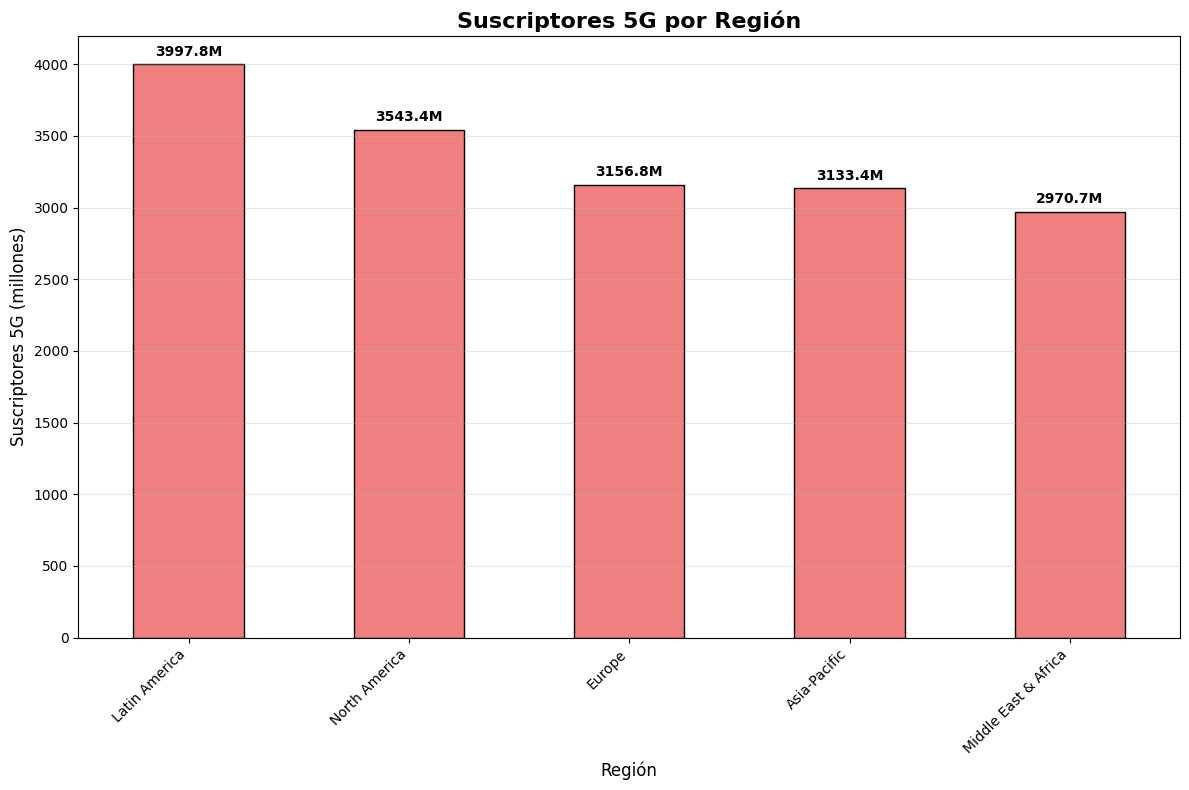


=== COBERTURA REGIONAL 5G ===

Cobertura Regional 5G promedio por Región (%):
Región
Asia-Pacific            76.45
Europe                  71.39
North America           70.29
Latin America           68.53
Middle East & Africa    64.92
Name: Cobertura Regional 5G (%), dtype: float64


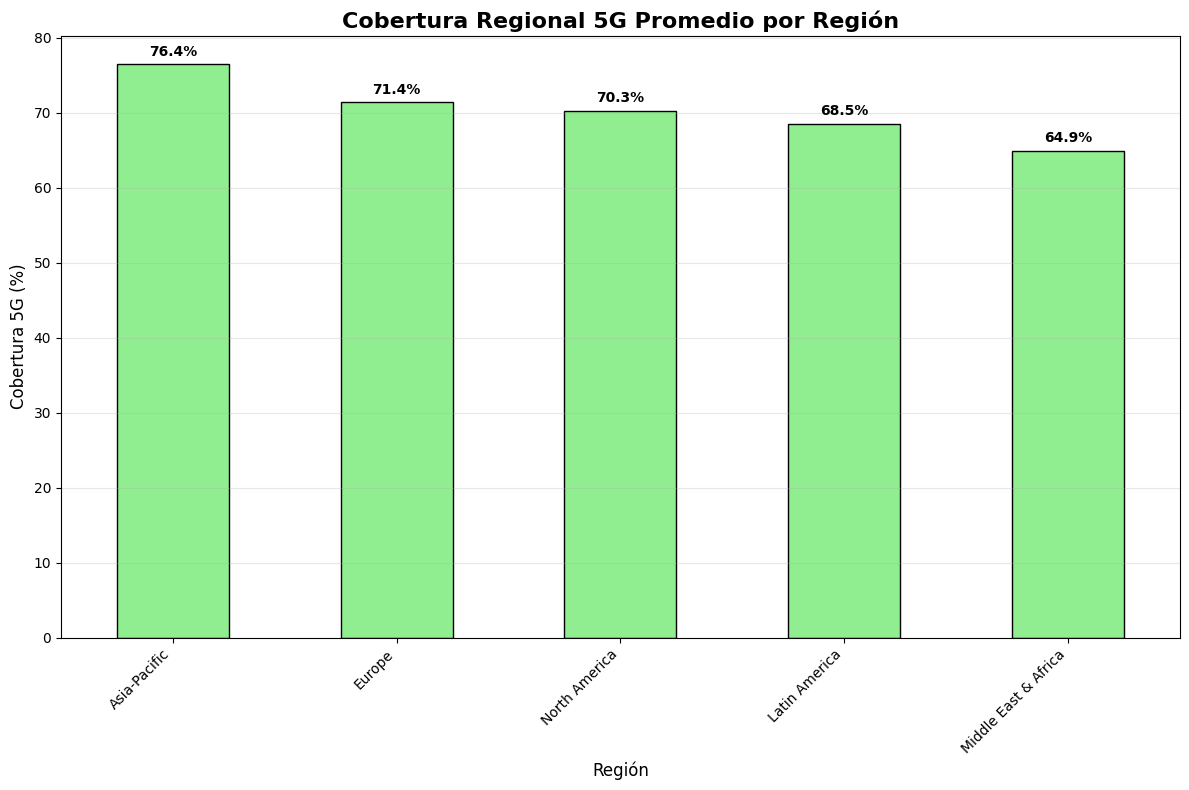


=== RELACIÓN COBERTURA vs SUSCRIPTORES ===

Datos combinados por región:
                 Región  Suscriptores_5G  Cobertura_5G
0         Latin America          3997.83     76.448111
1         North America          3543.40     71.385745
2                Europe          3156.84     70.292478
3          Asia-Pacific          3133.36     68.529339
4  Middle East & Africa          2970.70     64.923093


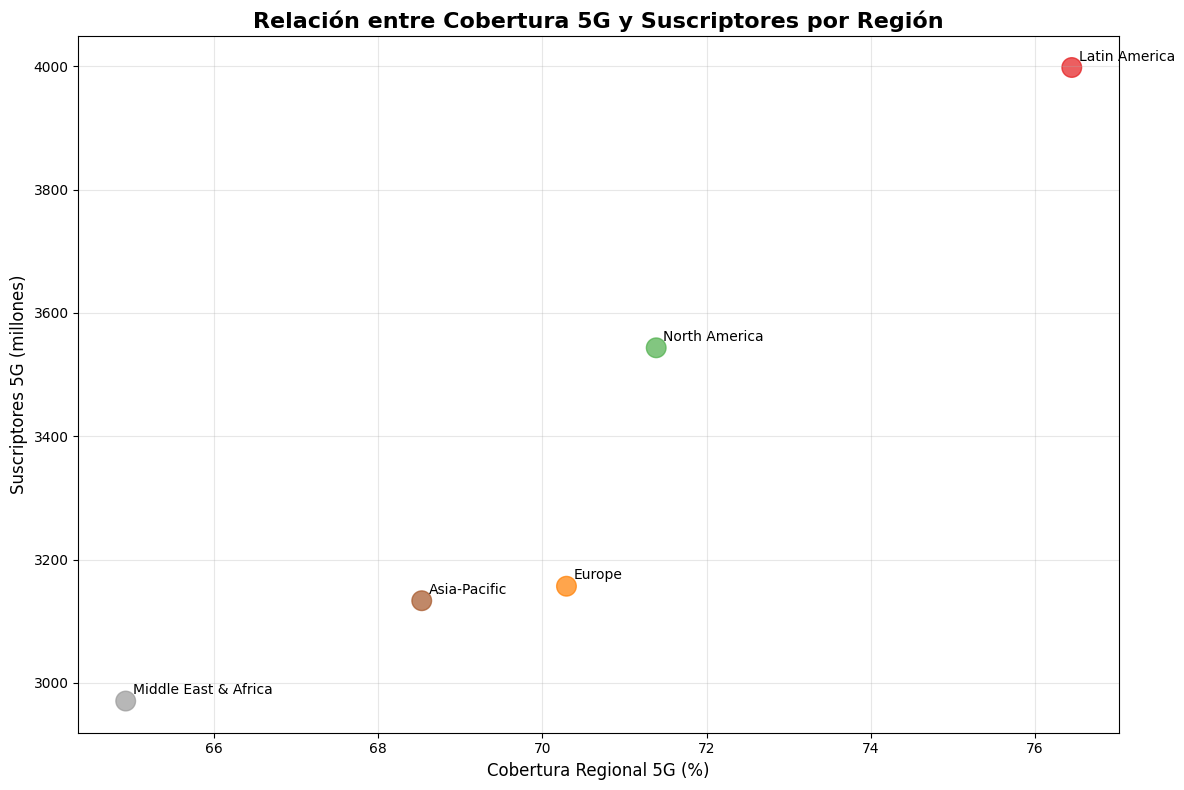


=== SUSCRIPTORES 5G POR MODELO Y REGIÓN ===

Suscriptores 5G por Modelo y Región:
Modelo de Producto    Galaxy A14 5G  Galaxy A32 5G  Galaxy A52 5G  \
Región                                                              
Asia-Pacific                 148.96         342.61         363.18   
Europe                       207.27         286.69         171.90   
Latin America                193.62         171.63         668.58   
Middle East & Africa         272.62         608.84         233.96   
North America                388.90         283.47         614.94   

Modelo de Producto    Galaxy A73 5G  Galaxy S22 5G  Galaxy S23 5G  \
Región                                                              
Asia-Pacific                 326.68         134.91         347.36   
Europe                       621.18         345.35          85.74   
Latin America                 37.98         719.22         373.87   
Middle East & Africa         334.69         526.33          75.30   
North America      

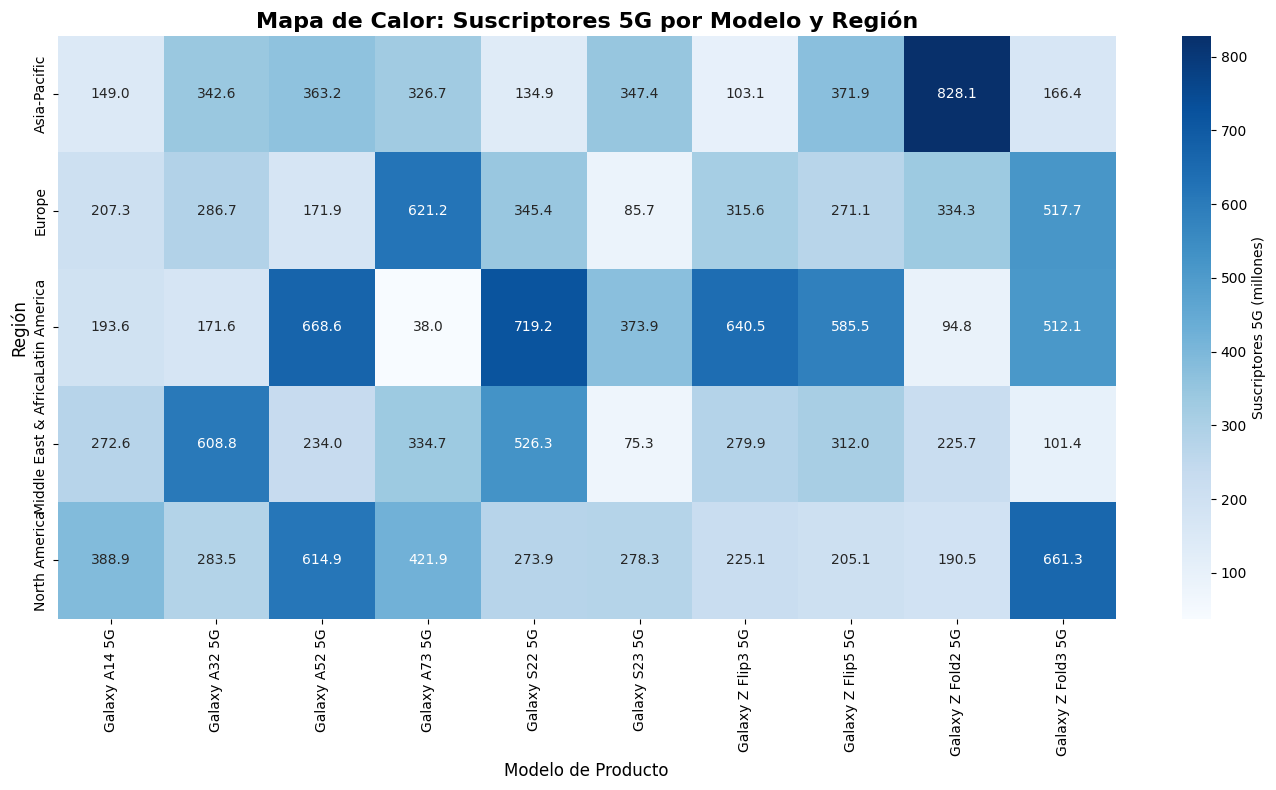


=== VELOCIDAD PROMEDIO 5G POR REGIÓN ===

Velocidad Promedio 5G por Región (Mbps):
Región
Middle East & Africa    193.77
Asia-Pacific            188.15
Latin America           182.45
Europe                  179.10
North America           166.85
Name: Velocidad Promedio 5G (Mbps), dtype: float64


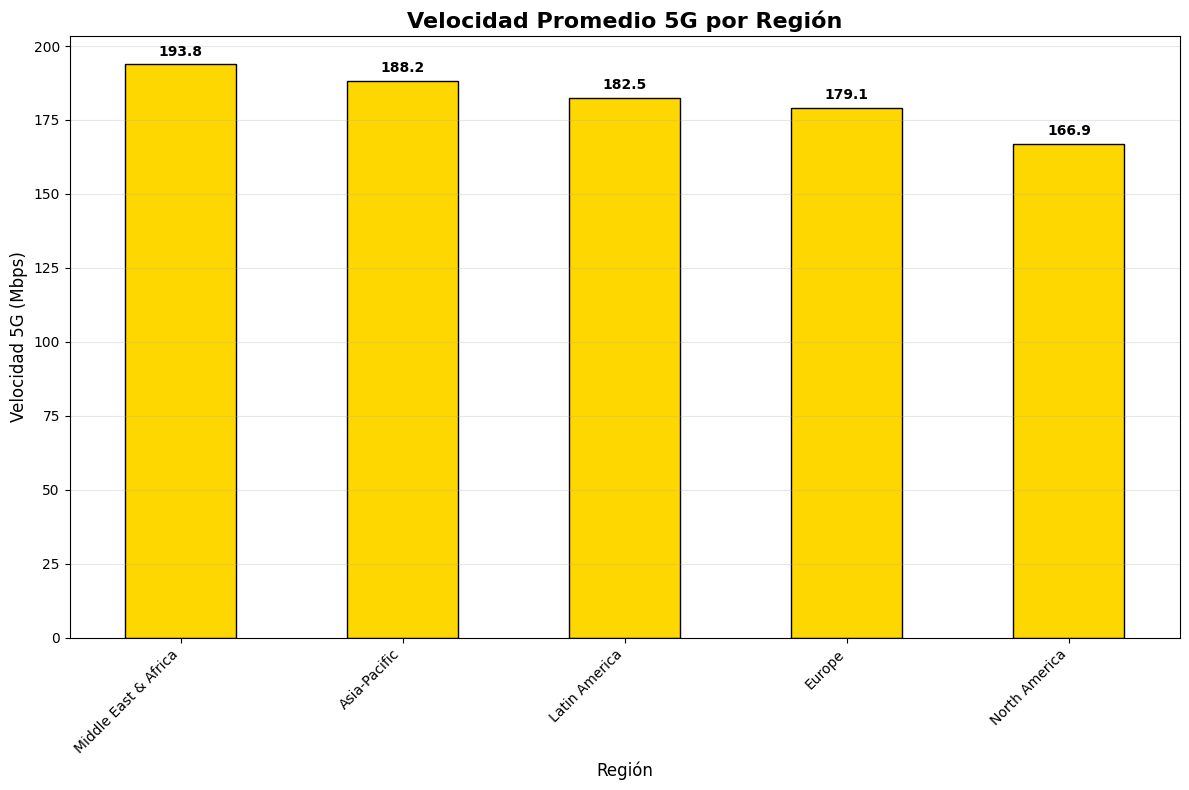


=== RESUMEN ESTADÍSTICO POR REGIÓN ===
                     Suscriptores 5G (millones)         \
                                            sum   mean   
Región                                                   
Asia-Pacific                            3133.36  34.82   
Europe                                  3156.84  33.58   
Latin America                           3997.83  33.04   
Middle East & Africa                    2970.70  30.63   
North America                           3543.40  31.36   

                     Cobertura Regional 5G (%) Velocidad Promedio 5G (Mbps)  \
                                          mean                         mean   
Región                                                                        
Asia-Pacific                             76.45                       188.15   
Europe                                   71.39                       179.10   
Latin America                            68.53                       182.45   
Middle East & Africa 

In [15]:
# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# 1. ANÁLISIS DE SUSCRIPTORES 5G POR REGIÓN
print("\n=== ANÁLISIS DE SUSCRIPTORES 5G POR REGIÓN ===")

# Agrupar suscriptores 5G por región
suscriptores_por_region = df.groupby('Región')['Suscriptores 5G (millones)'].sum().sort_values(ascending=False)
print("\nSuscriptores 5G por Región (millones):")
print(suscriptores_por_region)

# Gráfico de barras - Suscriptores por región
plt.figure(figsize=(12, 8))
ax1 = suscriptores_por_region.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Suscriptores 5G por Región', fontsize=16, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Suscriptores 5G (millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(suscriptores_por_region.values):
    plt.text(i, v + max(suscriptores_por_region) * 0.01, f'{v:.1f}M', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. COBERTURA REGIONAL 5G POR REGIÓN
print("\n=== COBERTURA REGIONAL 5G ===")

cobertura_por_region = df.groupby('Región')['Cobertura Regional 5G (%)'].mean().sort_values(ascending=False)
print("\nCobertura Regional 5G promedio por Región (%):")
print(cobertura_por_region.round(2))

# Gráfico de barras - Cobertura por región
plt.figure(figsize=(12, 8))
cobertura_por_region.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Cobertura Regional 5G Promedio por Región', fontsize=16, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Cobertura 5G (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(cobertura_por_region.values):
    plt.text(i, v + max(cobertura_por_region) * 0.01, f'{v:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. RELACIÓN ENTRE COBERTURA Y SUSCRIPTORES
print("\n=== RELACIÓN COBERTURA vs SUSCRIPTORES ===")

# Crear DataFrame para análisis de correlación
df_region_analysis = pd.DataFrame({
    'Región': suscriptores_por_region.index,
    'Suscriptores_5G': suscriptores_por_region.values,
    'Cobertura_5G': cobertura_por_region.values
})

print("\nDatos combinados por región:")
print(df_region_analysis)

# Gráfico de dispersión
plt.figure(figsize=(12, 8))
# Generar colores automáticamente según el número de regiones
colors = plt.cm.Set1(np.linspace(0, 1, len(df_region_analysis)))
plt.scatter(df_region_analysis['Cobertura_5G'], df_region_analysis['Suscriptores_5G'], 
           s=200, alpha=0.7, c=colors)

# Añadir etiquetas a cada punto
for i, region in enumerate(df_region_analysis['Región']):
    plt.annotate(region, 
                (df_region_analysis['Cobertura_5G'].iloc[i], 
                 df_region_analysis['Suscriptores_5G'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.title('Relación entre Cobertura 5G y Suscriptores por Región', fontsize=16, fontweight='bold')
plt.xlabel('Cobertura Regional 5G (%)', fontsize=12)
plt.ylabel('Suscriptores 5G (millones)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. ANÁLISIS POR MODELO Y REGIÓN
print("\n=== SUSCRIPTORES 5G POR MODELO Y REGIÓN ===")

# Tabla pivote para visualizar mejor los datos
pivot_suscriptores = df.groupby(['Región', 'Modelo de Producto'])['Suscriptores 5G (millones)'].sum().unstack(fill_value=0)
print("\nSuscriptores 5G por Modelo y Región:")
print(pivot_suscriptores.round(2))

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_suscriptores, annot=True, cmap='Blues', fmt='.1f', cbar_kws={'label': 'Suscriptores 5G (millones)'})
plt.title('Mapa de Calor: Suscriptores 5G por Modelo y Región', fontsize=16, fontweight='bold')
plt.xlabel('Modelo de Producto', fontsize=12)
plt.ylabel('Región', fontsize=12)
plt.tight_layout()
plt.show()

# 5. VELOCIDAD PROMEDIO 5G POR REGIÓN
print("\n=== VELOCIDAD PROMEDIO 5G POR REGIÓN ===")

velocidad_por_region = df.groupby('Región')['Velocidad Promedio 5G (Mbps)'].mean().sort_values(ascending=False)
print("\nVelocidad Promedio 5G por Región (Mbps):")
print(velocidad_por_region.round(2))

# Gráfico de barras - Velocidad por región
plt.figure(figsize=(12, 8))
velocidad_por_region.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Velocidad Promedio 5G por Región', fontsize=16, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Velocidad 5G (Mbps)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(velocidad_por_region.values):
    plt.text(i, v + max(velocidad_por_region) * 0.01, f'{v:.1f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 6. RESUMEN ESTADÍSTICO
print("\n=== RESUMEN ESTADÍSTICO POR REGIÓN ===")
resumen = df.groupby('Región').agg({
    'Suscriptores 5G (millones)': ['sum', 'mean'],
    'Cobertura Regional 5G (%)': 'mean',
    'Velocidad Promedio 5G (Mbps)': 'mean',
    'Preferencia por 5G (%)': 'mean',
    'Unidades Vendidas': 'sum'
}).round(2)

print(resumen)